In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils import one_hot_label
from generate_data import generate_data, generate_grid_data

from modules import Linear, Sequential
from modules.activations import ReLU, Sigmoid, Softmax, Tanh
from losses import LossMSE, LossSoftmaxCrossEntropy
from optimizers import SGD

In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
def default_net_1(x_train, y_train, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    model = Sequential(
        [
            Linear(num_of_neurons[0], num_of_neurons[1], activation=ReLU()),
            Linear(num_of_neurons[1], num_of_neurons[2], activation=ReLU()),
            Linear(num_of_neurons[2], num_of_neurons[3], activation=ReLU()),
            Linear(num_of_neurons[3], num_of_neurons[4])
        ]
    )

    mse = LossMSE()
    model.loss = mse
    # integrate loss function to optimizer like in Keras
    sgd = SGD(lr, momentum_coef)

    # TODO verbose
    sgd.train(model, x_train, y_train, num_of_epochs)

    return model, mse.loss_logging


def default_net_2(x_train, y_train, num_of_neurons=(2, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    lin1 = Linear(num_of_neurons[0], num_of_neurons[1])
    relu1 = ReLU()
    lin2 = Linear(num_of_neurons[1], num_of_neurons[2])
    mse = LossMSE()

    model = Sequential()
    model.add_module(lin1, name="Lin1")
    model.add_module(relu1, name="ReLU1")
    model.add_module(lin2, name="Lin2")
    model.loss = mse

    sgd = SGD(lr, momentum_coef)
    sgd.train(model, x_train, y_train, num_of_epochs)

    return model, mse.loss_logging


def default_net_3(input, target, num_of_neurons=(2, 25, 2), lr=0.01, momentum_coef=0.0, num_of_epochs=100):
    ce = LossSoftmaxCrossEntropy()
    model = Sequential(
        [
            Linear(num_of_neurons[0], num_of_neurons[1]),
            Tanh(),
            Linear(num_of_neurons[1], num_of_neurons[1]),
            ReLU(),
            Linear(num_of_neurons[1], num_of_neurons[2])
        ], loss_func=ce
    )

    sgd = SGD(lr, momentum_coef)

    sgd.train(model, input, target, num_of_epochs)

    return model, ce.loss_logging


In [4]:
points, labels = generate_data(is_torch=True, num_of_points=1000)
print(type(points), " -- ", type(labels))
labels = one_hot_label(labels, val=0)  # convert labels to 1-hot encoding

model, loss1 = default_net_1(points, labels, num_of_epochs=2500)
print(loss1)

  0%|          | 47/25000 [00:00<00:53, 465.29it/s]

<class 'torch.FloatTensor'>  --  <class 'torch.FloatTensor'>
Name: 0 
Name: 0_ReLU 
Name: 1 
Name: 1_ReLU 
Name: 2 
Name: 2_ReLU 
Name: 3 


 22%|██▏       | 5460/25000 [00:06<00:24, 791.40it/s]


KeyboardInterrupt: 

In [12]:
p = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51, is_torch=True)
model.print_model()

Name: 0
Name: 0_ReLU
Name: 1
Name: 1_ReLU
Name: 2
Name: 2_ReLU
Name: 3


In [13]:
out1 = model.predict(p)
print(out1)


 0
 0
 0
⋮ 
 0
 0
 0
[torch.LongTensor of size 2601]



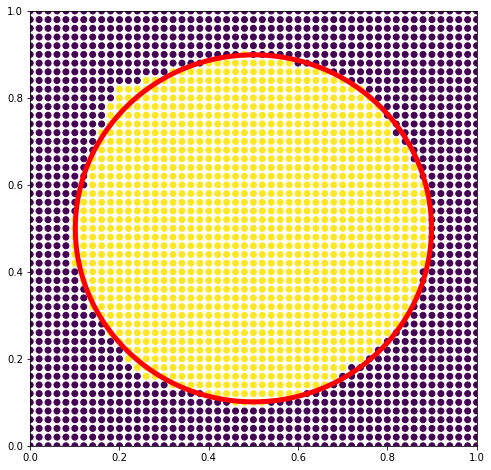

In [14]:
plot_data(p, out1)